In [1]:
from IPython.display import display, HTML
display(HTML("<style>:root { --jp-notebook-max-width: 90% !important; }</style>"))

# Predicting the sale price of a bulldozer using Machine Learning
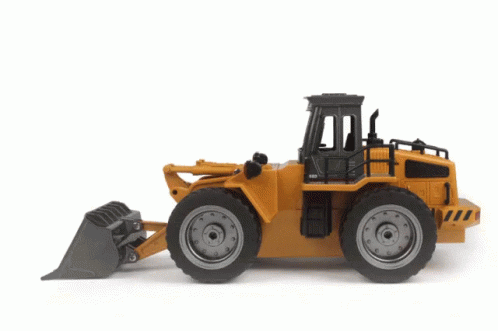

In this notebook,  we are going through an example machine learning project with the goal of predicting a sale price for bulldozers.

## 1. Problem Definition
      Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers.

## 2. Data Type
      The data is downloaded from the Kaggle Bluebook for Bulldozers Competition - 
      https://www.kaggle.com/c/bluebook-for-bulldozers/data

* Train.csv is the training set, which contains data through the end of 2011.* 
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.n.
    
## 3. Evaluation Metrics
  The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
   
   For more on the evaluation of this project go through - https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

   Note : The goal of every regression model is to minimise the error.
   For example -  Our goal for this model is to minimise the RMSLE.cs
## 4. Featur

Kaggle provides a data dictionary having all the features os the dataset - https://www.kaggle.com/competitions/bluebook-for-bulldozers/dataes


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [3]:
# Import Train and validation set

df = pd.read_csv("data/TrainAndValid.csv",
                 low_memory = False)

In [4]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412697,6333349,13000.0,1944743,21436,149,2.0,2006,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [7]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

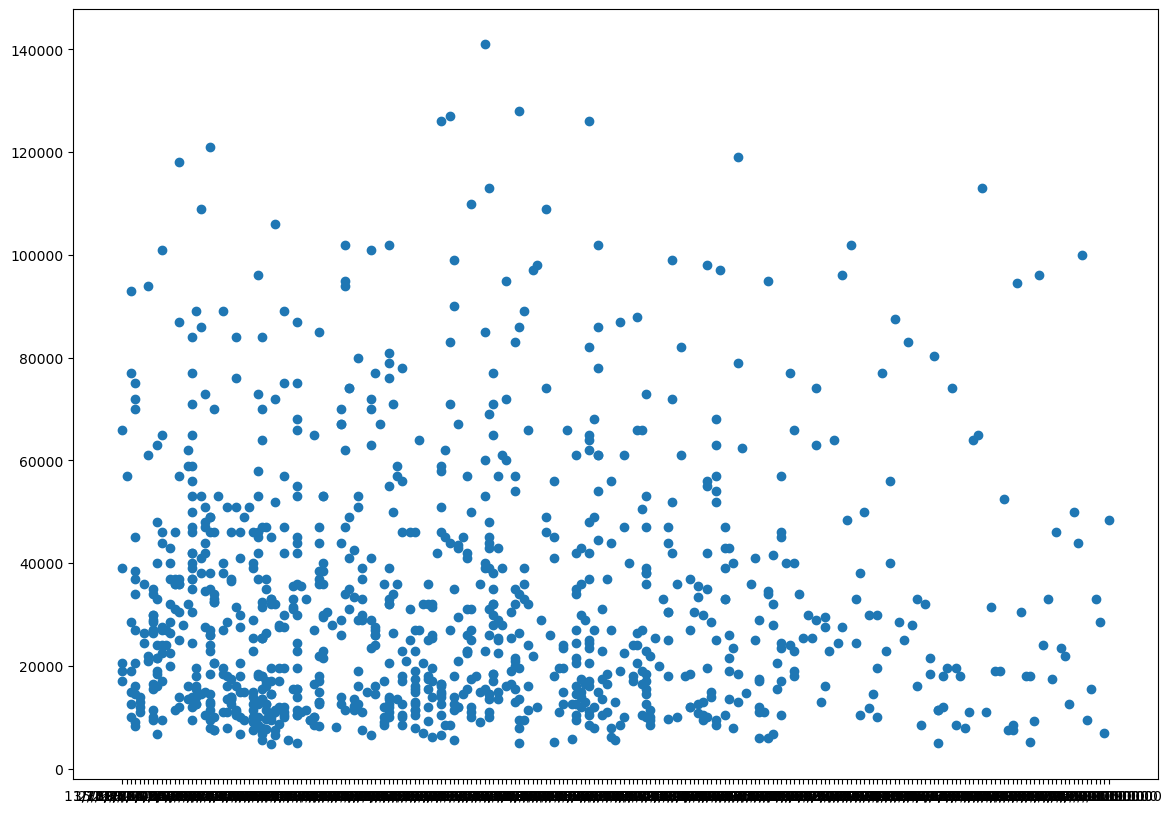

In [8]:
fig, ax = plt.subplots(figsize = (14,10))
ax.scatter(df.saledate[:1000], df.SalePrice[:1000])

<Axes: ylabel='Frequency'>

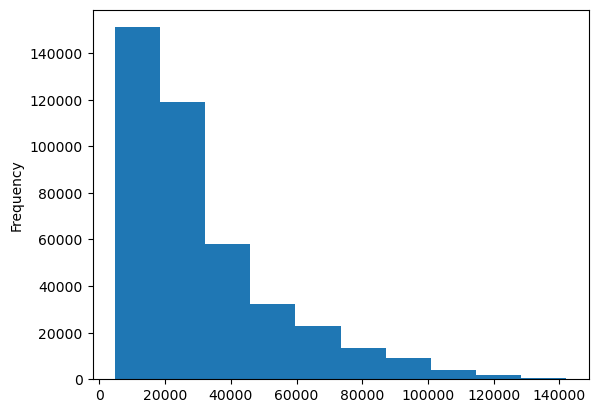

In [9]:
df.SalePrice.plot.hist()

### Parsing Dates

When we are working with Time Series Data, we want to enrich the date And time components as much as possible 

We can do so by telling pandas taht which columns have dates in it using `parse_date` parameter

In [10]:
# Import data again nut this time parse date

df = pd.read_csv("data/TrainAndValid.csv", 
                 low_memory = False,
                 parse_dates = ["saledate"])

In [11]:
df.saledate.dtype


dtype('<M8[ns]')

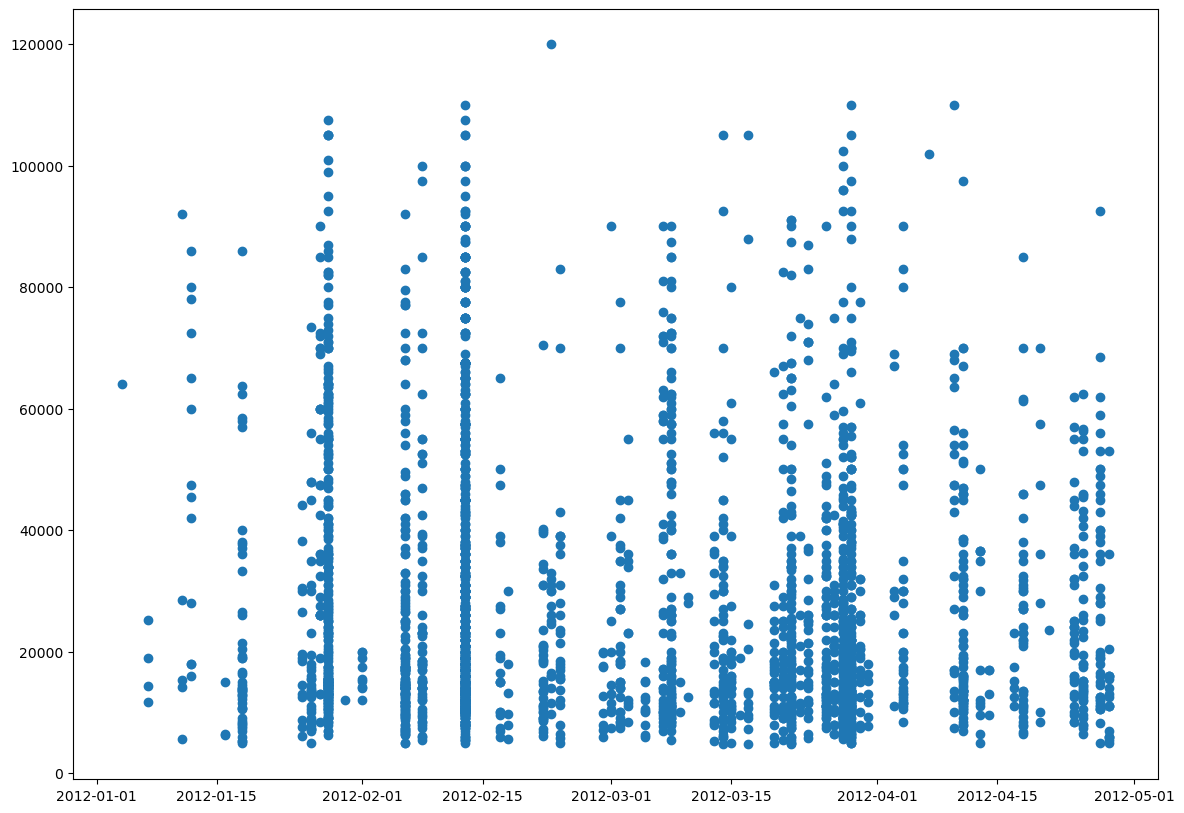

In [12]:
fig, ax = plt.subplots(figsize = (14,10))
ax.scatter(df.saledate[410000:420000], df.SalePrice[410000:420000])

### Sort dataframe by saledate

When working with time series data it,s good to sort the data by dates

In [13]:
# sort dataframe by dtae order

df.sort_values(by = ['saledate'],
               inplace = True,
               ascending = True )

In [14]:
df.head(n = 20)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Make a copy of the original dataframe so that we always have our original data to work with

In [15]:
df_temp = df.copy()

In [16]:
df_temp.head(20)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Feature Engineering(Adding or modifying the features)

Add date time parameters for `saledate` column

In [17]:
df_temp["SaleMonth"] = df_temp.saledate.dt.month
df_temp["SaleYear"] = df_temp.saledate.dt.year
df_temp["SaleDay"] = df_temp.saledate.dt.day
df_temp["SaleDayOfWeek"] = df_temp.saledate.dt.dayofweek
df_temp["SaleDayOfYear"] = df_temp.saledate.dt.dayofyear

In [18]:
df_temp.tail().T

,410879,412476,411927,407124,409203
SalesID,6302984,6324811,6313029,6266251,6283635
SalePrice,16000.0,6000.0,16000.0,55000.0,34000.0
MachineID,1915521,1919104,1918416,509560,1869284
ModelID,5266,19330,17244,3357,4701
datasource,149,149,149,149,149
auctioneerID,99.0,99.0,99.0,99.0,99.0
YearMade,2001,2004,2004,1993,1000
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00


In [19]:
# Now we have access to all DateTime attributes needed so let's remove saledate column
df_temp.drop("saledate", axis = 1, inplace = True)

In [20]:
df_temp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

### Modelling
We have done enough EDA(we can always do more) but let's start dooing some model driven EDA(Exploratory Data Analysis)

In [21]:
# Let's build a machine leraning model
# np.random.seed(42)   # We can use random state in place of random seed inside our model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs= -1,
                              random_state= 42)

#model.fit(df_temp.drop("SalePrice", axis = 1), df_temp["SalePrice"])

### Convert String into categories

One way to turn all our data into numbers is by converting them into pandas categories.

We can check different data types compatible with pandas here:
https://pandas.pydata.org/pandas-docs/version/1.4/reference/general_utility_functions.html

In [22]:
pd.api.types.is_string_dtype(df_temp["SalePrice"])

False

In [23]:
pd.api.types.is_string_dtype(df_temp["UsageBand"])

False

In [24]:
pd.api.types.is_object_dtype(df_temp["UsageBand"])

True

In [25]:
pd.api.types.is_numeric_dtype(df_temp["UsageBand"])

False

In [26]:
# Let's find the columns with string

for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [27]:
# Find the column with dtype object

for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [28]:
# let's convert our object type data into categorical

for label, content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        df_temp[label] = content.astype('category').cat.as_ordered()

In [29]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [30]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [31]:

df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks to pandas categories to guve us a way to access all our data in form of numbers

In [32]:
# Check missing data
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [33]:
df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save Preprocessed data

In [34]:
df_temp.to_pickle("Data/train_temp.pkl")

In [35]:
# Import preprocessed data

df_temp = pd.read_pickle("Data/train_temp.pkl")

## Fill Missing data

### Filling numeric value first

In [36]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)


    

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
SaleMonth
SaleYear
SaleDay
SaleDayOfWeek
SaleDayOfYear


In [37]:
# Check whether the numeric columns have missing value or not
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [38]:
# Filling null values of numeric data
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add columns which tells us if the data was missing or not
            df_temp[label + "_is_missing"] = pd.isnull(content)
            # fill the missing values
            df_temp[label] = content.fillna(content.median())

In [39]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 59 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   SalesID                              412698 non-null  int64   
 1   SalePrice                            412698 non-null  float64 
 2   MachineID                            412698 non-null  int64   
 3   ModelID                              412698 non-null  int64   
 4   datasource                           412698 non-null  int64   
 5   auctioneerID                         412698 non-null  float64 
 6   YearMade                             412698 non-null  int64   
 7   MachineHoursCurrentMeter             412698 non-null  float64 
 8   UsageBand                            73670 non-null   category
 9   fiModelDesc                          412698 non-null  category
 10  fiBaseModel                          412698 non-null  category
 11  

### Filling missing categorical value

In [40]:
# Finding columns with missing categorical value
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [41]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [42]:
# Turn categorical variables into numbers and fill missing data
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add columns to indicate whether the columns ahave missing values or not
        df_temp[label + '_is_missing'] = content.isnull()
        # turn categories into numbers and add +1 (+1 is because when we turn it into numbers the missing data is represented by -1, so it will make it 0)
        df_temp[label] = pd.Categorical(content).codes +1
        

In [43]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 73.2 MB


In [44]:
df_temp.isna().sum()[:20]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
dtype: int64

Now as all of our data is numeric and there is no missing values, Let's fit a machine leraning model

## Modelling

In [45]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [46]:
%%time  
# Instantiate our model
np.random.seed(42)
model = RandomForestRegressor(n_jobs = -1)

# Fit the model
model.fit(df_temp.drop("SalePrice", axis = 1), df_temp["SalePrice"])

CPU times: total: 16min 4s
Wall time: 1min 37s


RandomForestRegressor(n_jobs=-1)

In [47]:
model.score(df_temp.drop("SalePrice", axis = 1), df_temp["SalePrice"])

0.9875400605585856

**Question**: Why does the above metric is not reliable?

Because we have evaluated our data on the same data it was trained on

### Splitting our data into training and validation set

In [48]:
df_temp.SaleYear.value_counts()

SaleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [49]:
# validation set

df_val = df_temp[df_temp["SaleYear"] == 2012]

df_train = df_temp[df_temp["SaleYear"] != 2012]



In [50]:
X_train, y_train = df_train.drop("SalePrice", axis = 1), df_train["SalePrice"]

X_valid, y_valid = df_val.drop("SalePrice", axis = 1), df_val["SalePrice"]


### Building a custom evaluation metrics

In [51]:
# create a evaluation function(Root Mean Squared Log error)

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    '''
    Calculate root mean squared log error between true and predicted value of y 
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

In [52]:
# Create function to eavluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
               "Valid MAE": mean_absolute_error(y_valid, valid_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
               "Valid RMSLE": rmsle(y_valid, valid_preds),
               "Training R^2": r2_score(y_train, train_preds),
               "Valid R^2": r2_score(y_valid, valid_preds)}
    return scores

## Testing our model on a Subset(To tune the hyperparameters)

In [53]:
%%time
# If we directly train our model on original dataset ii will take too much time 

model = RandomForestRegressor(n_jobs = -1,
                              random_state=42,
                              max_samples=10000)

model.fit(X_train,y_train)

CPU times: total: 33.3 s
Wall time: 3.84 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [54]:
show_scores(model)

{'Training MAE': 5560.985563751947,
 'Valid MAE': 7173.100452778017,
 'Training RMSLE': 0.25782391312638075,
 'Valid RMSLE': 0.2932829872315904,
 'Training R^2': 0.8607048609569484,
 'Valid R^2': 0.8320834237261435}

### Hyperparameter tuning with randomizedsearchCV

In [55]:
%%time

np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators" : np.arange(10,100,10),
           "max_samples" : [10000],
           "max_features" : [0.5, 1, 'sqrt', None],
           "min_samples_split" : np.arange(2,20,2),
           "min_samples_leaf" : np.arange(1,20,2),
           "max_depth" : [None, 2, 5, 10]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1),
                              param_distributions = rf_grid,
                              n_iter = 2,
                              cv = 5, 
                              verbose = True)
# Fit the RandomizedSearchCV model 
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 4.81 s
Wall time: 16.2 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_iter=2,
                   param_distributions={'max_depth': [None, 2, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt', None],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [56]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': None}

In [57]:
best_parameters = {'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': None,
 'max_depth': None}

In [58]:
# Evaluate the RandomizedSearchCV score
show_scores(rs_model)

{'Training MAE': 8869.819324419717,
 'Valid MAE': 11483.245491847301,
 'Training RMSLE': 0.39140319748507296,
 'Valid RMSLE': 0.45775831942766987,
 'Training R^2': 0.6830606787696458,
 'Valid R^2': 0.6303837511508384}

### Train a model with best hyperparameters

**Note:** These best hyperparameters are found with 100 iterations of `RandomizedSearchCV`

In [59]:
best_params1 = {"n_estimators" : 40,
                "min_samples_leaf" : 1,
                "min_samples_split" : 14,
                "max_samples" : None,
                "max_featues" : 0.5
                }

best_model = RandomForestRegressor(n_estimators = 40,
                                   min_samples_leaf = 1,
                                   min_samples_split = 14,
                                   max_samples = None,
                                   max_features = 0.5,
                                   n_jobs = -1,
                                   random_state = 42)

best_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [60]:
show_scores(best_model)

{'Training MAE': 2955.4815660106988,
 'Valid MAE': 5961.36535611684,
 'Training RMSLE': 0.144755813440218,
 'Valid RMSLE': 0.24611703146487926,
 'Training R^2': 0.9587255041774946,
 'Valid R^2': 0.8819134649254987}

## Make prediction on test data

In [61]:
# Import the test data
test_data = pd.read_csv("Data/Test.csv",
                        parse_dates = ["saledate"])

In [62]:
test_data

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [63]:
test_data.saledate.dtype

dtype('<M8[ns]')

### Let's convert the data into numerical 

In [64]:
test_data.dtypes

SalesID                              int64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                         int64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type                            object
Ride_Contro

In [65]:
np.random.seed(42)

for label, content in test_data.items():
    if pd.api.types.is_object_dtype(content):
        test_data[label] = content.astype('category').cat.as_ordered()

In [66]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   category      
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  category      
 10  fiBaseModel               12457 non-null  category      
 11  fiSecondaryDesc           8482 non-null   category      
 12  fiModelSeries     

In [67]:
# Now let's Add time stamp
test_data["SaleYear"] = test_data.saledate.dt.year
test_data["SaleMonth"] = test_data.saledate.dt.month
test_data["SaleDay"] = test_data.saledate.dt.day
test_data["SaleDayOfYear"] = test_data.saledate.dt.dayofyear
test_data["SaleDayOfWeek"] = test_data.saledate.dt.dayofweek

In [68]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   category      
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  category      
 10  fiBaseModel               12457 non-null  category      
 11  fiSecondaryDesc           8482 non-null   category      
 12  fiModelSeries     

In [69]:
test_data = test_data.drop("saledate", axis = 1)

In [70]:
for label, content in test_data.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
SaleYear
SaleMonth
SaleDay
SaleDayOfYear
SaleDayOfWeek


### now that we have our data numeric Let's fill the missing value


In [71]:
# Let's fill the numeric data first

for label, content in test_data.items():
    if pd.api.types.is_numeric_dtype(content):
        test_data[label] = content.fillna(content.median)

In [72]:
test_data.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter        0
UsageBand                   10623
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type              11806
Engine_Horsepo

In [73]:
# Now we only have to fill the categorical value
for label, content in test_data.items():
    if not pd.api.types.is_numeric_dtype(content):
         # Add columns to indicate whether the columns ahave missing values or not
        test_data[label + '_is_missing'] = content.isnull()
        # turn categories into numbers and add +1 (+1 is because when we turn it into numbers the missing data is represented by -1, so it will make it 0)
        test_data[label] = pd.Categorical(content).codes +1

In [74]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), int16(3), int32(5), int64(6), int8(42)
memory usage: 1.9 MB


**Now the problem is that our training data has 102 columns and our test_data has 101 columns**

In [75]:
# Let's see how the columns differs using a python function sets
set(X_train.columns) - set(test_data.columns)

{'auctioneerID_is_missing'}

In [76]:
# Manually adjust test_data
test_data["auctioneerID_is_missing"] = False

C:\Users\pc\AppData\Local\Temp\ipykernel_6328\2495753177.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data["auctioneerID_is_missing"] = False


In [77]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 102 entries, SalesID to auctioneerID_is_missing
dtypes: bool(46), int16(3), int32(5), int64(6), int8(42)
memory usage: 1.9 MB


In [78]:
set(X_train.columns) - set(test_data.columns)

set()

In [79]:
print(best_model.feature_names_in_)

['SalesID' 'MachineID' 'ModelID' 'datasource' 'auctioneerID' 'YearMade'
 'MachineHoursCurrentMeter' 'UsageBand' 'fiModelDesc' 'fiBaseModel'
 'fiSecondaryDesc' 'fiModelSeries' 'fiModelDescriptor' 'ProductSize'
 'fiProductClassDesc' 'state' 'ProductGroup' 'ProductGroupDesc'
 'Drive_System' 'Enclosure' 'Forks' 'Pad_Type' 'Ride_Control' 'Stick'
 'Transmission' 'Turbocharged' 'Blade_Extension' 'Blade_Width'
 'Enclosure_Type' 'Engine_Horsepower' 'Hydraulics' 'Pushblock' 'Ripper'
 'Scarifier' 'Tip_Control' 'Tire_Size' 'Coupler' 'Coupler_System'
 'Grouser_Tracks' 'Hydraulics_Flow' 'Track_Type' 'Undercarriage_Pad_Width'
 'Stick_Length' 'Thumb' 'Pattern_Changer' 'Grouser_Type'
 'Backhoe_Mounting' 'Blade_Type' 'Travel_Controls' 'Differential_Type'
 'Steering_Controls' 'SaleMonth' 'SaleYear' 'SaleDay' 'SaleDayOfWeek'
 'SaleDayOfYear' 'auctioneerID_is_missing'
 'MachineHoursCurrentMeter_is_missing' 'UsageBand_is_missing'
 'fiModelDesc_is_missing' 'fiBaseModel_is_missing'
 'fiSecondaryDesc_is_missin

In [80]:
# So now a problem arises that is- Our data in test_data is not in same order as training data, so let's make it that way

test_data = test_data[best_model.feature_names_in_]

In [81]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 102 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), int16(3), int32(5), int64(6), int8(42)
memory usage: 1.9 MB


In [82]:
# Lets try again testing our data
test_pred = best_model.predict(test_data)

In [83]:
test_pred

array([18250.08769427, 15893.94686357, 50864.83028812, ...,
       13305.26103383, 16074.86578512, 26618.63116654])

In [84]:
# So now we will change our output result in the format kaggle want it to be
Output_result = pd.DataFrame({"SalesID" : test_data.SalesID,
                              "SalesPrice" : test_pred}
                             )

In [85]:
print(Output_result)

       SalesID    SalesPrice
0      1227829  18250.087694
1      1227844  15893.946864
2      1227847  50864.830288
3      1227848  68812.058439
4      1227863  56015.727146
...        ...           ...
12452  6643171  38982.429948
12453  6643173  11923.705782
12454  6643184  13305.261034
12455  6643186  16074.865785
12456  6643196  26618.631167

[12457 rows x 2 columns]


In [86]:
# Export prediction data 
Test_result = Output_result.to_pickle("Data/test_result.pkl")

In [87]:
Test_result = pd.read_pickle("Data/test_result.pkl")

### Feature Importance
**It helps us to find out which features play the pivotal role in predicting our data**

In [88]:
best_model.feature_importances_

array([3.15044145e-02, 1.73104882e-02, 4.90967504e-02, 1.78211593e-03,
       3.35311792e-03, 2.13344061e-01, 3.15430206e-03, 1.03639916e-03,
       4.63313269e-02, 3.82782442e-02, 5.60965055e-02, 4.51656600e-03,
       1.54733007e-02, 1.51203666e-01, 4.57369139e-02, 5.95284041e-03,
       4.25569412e-03, 2.05444316e-03, 2.65873701e-03, 5.74208597e-02,
       4.17561018e-04, 1.26735600e-04, 7.96292500e-04, 2.04997081e-04,
       1.27650606e-03, 2.48208750e-05, 2.22344563e-03, 2.28692809e-03,
       3.17959661e-03, 4.56572083e-03, 5.41004417e-03, 1.95166497e-03,
       3.44369935e-03, 8.25341181e-04, 2.21627427e-03, 2.69975815e-03,
       8.82935100e-04, 1.37437217e-02, 1.44548854e-03, 3.53181974e-03,
       9.73196111e-04, 8.39386975e-04, 2.75366878e-03, 5.61547479e-04,
       5.00082266e-04, 3.97575218e-04, 2.31030432e-04, 2.71598346e-03,
       7.57709279e-04, 2.39627613e-04, 2.13140732e-04, 3.83221656e-03,
       7.45462853e-02, 5.59031055e-03, 2.91089542e-03, 9.88770563e-03,
      

In [93]:
# Let's plot the data using helper function
def plot_features(columns, importances, n = 20):
    df = (pd.DataFrame({"Features" : columns,
                        "Feature_Importances" : importances})
         .sort_values("Feature_Importances", ascending = False)
         .reset_index(drop = True))
    # Plot the DataFrame
    fig, ax = plt.subplots()
    ax.barh(df["Features"][:n], df["Feature_Importances"][:n])
    ax.set_xlabel("Features")
    ax.set_ylabel("Feature_Importances")
    ax.invert_yaxis()

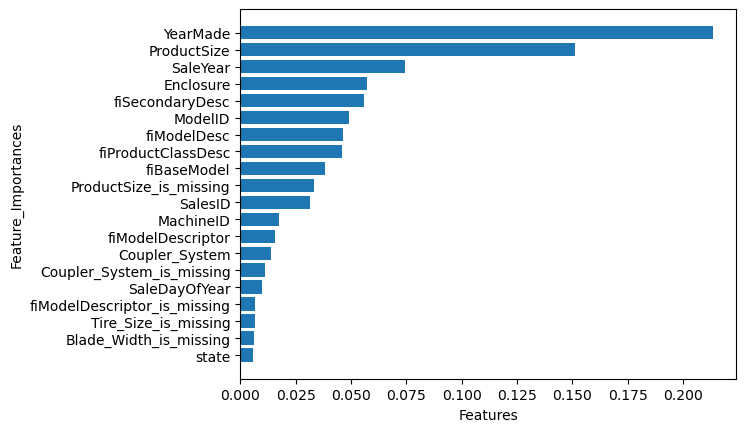

In [94]:
plot_features(X_train.columns, best_model.feature_importances_ )